# Figures:

From bioRxiv v. 1:

Fig 3C, S4B (Gabs); Fig S6A (Brks); Fig S6B (Gabs and brks)

# Cells to run

## Setup

In [1]:
import numpy as np
import pandas as pd
import sys, copy, time
import itertools as it

sys.path.extend(['../', '../../../'])
import mean_dff_over_days_analysis as mda
import mean_dff_over_days_plotting as mdp

from analysis import session
from util import gen_util, plot_util, file_util, math_util

from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
"""
Initialization
"""

# path to data directory
datadir = '/home/jay/Dropbox/research/yu/dendrites/new-dff-and-data'
# name for mouse_df
mouse_df_fnm = '/home/jay/Dropbox/research/yu/dendrites/' + \
    'eyes/custom-dendrites-aibs-code/OpenScope_CA_Analysis/mouse_df.csv'


# obtain mouse_df and mouse numbers, both full and only those with data for 
#  sessions 1 through 3
mouse_df, mouse_ns_full, mouse_ns_sess_123 = mda.set_up_mouse_info(mouse_df_fnm)

# General parameters for functions
stimtype_list = ['gabors', 'bricks']
brk_dir = 'any'
op = 'd-prime'
scale = True
remnans = False
sess_ns = [1,2,3]

All mice:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Mice with all of sessions 1-3 : [ 1  3  4  6  7  8  9 10 11 12 13]


# Dataframes

## Generate dataframes

In [4]:
"""
Generate main mouse-by-mouse df/f session-averaged dataframes
"""

# All ROIs
gab_all_mn_dff_df, brk_all_mn_dff_df = \
    mda.make_session_averaged_df(mouse_df, mouse_df_fnm, datadir, mouse_ns_full,
                                 sess_ns, stimtype_list, only_matched_rois=False)

# Tracked ROIs
gab_trk_mn_dff_df, brk_trk_mn_dff_df = \
    mda.make_session_averaged_df(mouse_df, mouse_df_fnm, datadir, mouse_ns_sess_123,
                                 sess_ns, stimtype_list, only_matched_rois=True)


Stimulus: gabors

Mouse  1   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 96

Mouse  1   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 74

Mouse  1   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 107



nope for mouse  2 , sess  1
nope for mouse  2 , sess  2
nope for mouse  2 , sess  3




Mouse  3   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 87

Mouse  3   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 90

Mouse  3   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loadin

Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 87
pre, post =  0 1

Mouse  3   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 90
pre, post =  0 1

Mouse  3   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 80
pre, post =  0 1




Mouse  4   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 90
pre, post =  0 1

Mouse  4   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 70
pre, post =  0 1

Mouse  4   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loa

Getting data for gabors
Number of ROIs: 58

Mouse  1   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 58




Mouse  3   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 55

Mouse  3   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 55

Mouse  3   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 55




Mouse  4   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 45

Mouse  4   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for gabors
Number of ROIs: 

Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 145
pre, post =  0 1




Mouse  7   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 11
pre, post =  0 1

Mouse  7   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 11
pre, post =  0 1

Mouse  7   Session 3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 11
pre, post =  0 1




Mouse  8   Session 1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Getting data for bricks
pre, post =  0 1
Number of ROIs: 27
pre, post =  0 1

Mouse  8   Session 2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
Ge

In [6]:
"""
Generate normalized, summary layer/compartment df/f session-averaged dataframes
"""
# All ROIs
print('\nAll ROIs\n')
gab_all_abc_lyr_cmpt_dff_normed_df, gab_all_dug_lyr_cmpt_dff_normed_df, \
    brk_all_lyr_cmpt_dff_normed_df = \
    mda.make_normed_summary_dfs(gab_all_mn_dff_df, brk_all_mn_dff_df, sess_ns,\
                                n_perm=1e5)

# Tracked ROIs
print('\nTracked ROIs\n')
gab_trk_abc_lyr_cmpt_dff_normed_df, gab_trk_dug_lyr_cmpt_dff_normed_df, \
    brk_trk_lyr_cmpt_dff_normed_df = \
    mda.make_normed_summary_dfs(gab_trk_mn_dff_df, brk_trk_mn_dff_df, sess_ns,\
                                n_perm=1e5)


All ROIs

Making normalized dataframes

Mouse  1
Mouse  3
Mouse  4
Mouse  6
Mouse  7
Mouse  8
Mouse  9
Mouse  10
Mouse  11
Mouse  12
Mouse  13
Mouse  1
Mouse  3
Mouse  4
Mouse  6
Mouse  7
Mouse  8
Mouse  9
Mouse  10
Mouse  11
Mouse  12
Mouse  13


Make summarized dataframe for frames A, B, C

expec sequences


Compute intersession p-values for Gabor frames A, B, C

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


Compute intersession p-values for Gabor frames D/U, G

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


Compute intersession p-values for bricks

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
571.9 sec
unexp sequences


Compute intersession p-values for Gabor frames A, B, C

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


Compute inte

In [4]:
"""
Generate absolute fractional changes dataframe for unexpected stimuli
"""

t = time.time()

dff_unexp_abs_frac_changes_df = \
    mda.make_unexp_frac_changes_df(gab_all_dug_lyr_cmpt_dff_normed_df, 
                                   brk_all_lyr_cmpt_dff_normed_df, 
                                   n_perm=1e5, n_bstrap=1e4)

print('{:.2f}'.format(time.time()-t))

L2/3 dend
L5 dend
L2/3 soma
L5 soma
all all
3.06


## Write dataframes

In [5]:
# Mouse-by-mouse dataframes

# All ROIs
gab_all_mn_dff_df.to_hdf('../data/gab-all-mn-dff-df.h5', 'data')
brk_all_mn_dff_df.to_hdf('../data/brk-all-mn-dff-df.h5', 'data')

# Tracked ROIs
gab_trk_mn_dff_df.to_hdf('../data/gab-trk-mn-dff-df.h5', 'data')
brk_trk_mn_dff_df.to_hdf('../data/brk-trk-mn-dff-df.h5', 'data')

################

# Normalized summary layer/compartment dataframes

# All ROIs
gab_all_abc_lyr_cmpt_dff_normed_df.to_hdf(
    '../data/gab-all-abc-lyr-cmpt-dff-normed-df.h5', 'data')
gab_all_dug_lyr_cmpt_dff_normed_df.to_hdf(
    '../data/gab-all-dug-lyr-cmpt-dff-normed-df.h5', 'data')
brk_all_lyr_cmpt_dff_normed_df.to_hdf(
    '../data/brk-all-lyr-cmpt-dff-normed-df.h5', 'data')

# Tracked ROIs
gab_trk_abc_lyr_cmpt_dff_normed_df.to_hdf(
    '../data/gab-trk-abc-lyr-cmpt-dff-normed-df.h5', 'data')
gab_trk_dug_lyr_cmpt_dff_normed_df.to_hdf(
    '../data/gab-trk-dug-lyr-cmpt-dff-normed-df.h5', 'data')
brk_trk_lyr_cmpt_dff_normed_df.to_hdf(
    '../data/brk-trk-lyr-cmpt-dff-normed-df.h5', 'data')

################

# |fractional df/f| changes for unexpected events

dff_unexp_abs_frac_changes_df.to_hdf(
    '../data/dff-unexp-abs-frac-changes-df.h5', 'data')

/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['mouse_n', 'sess_n', 'layer', 'compartment', 'stimtype', 'num_rois',
       'expec_a', 'expec_b', 'expec_c', 'expec_d', 'expec_g', 'unexp_a',
       'unexp_b', 'unexp_c', 'unexp_u', 'unexp_g'],
      dtype='object')]

  encoding=encoding,
/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['mouse_n', 'sess_n', 'layer', 'compartment', 'stimtype', 'num_rois',
       'brk_expec', 'brk_unexp'],
      dtype='object')]

  encoding=encoding,
/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/p

## Read dataframes

In [6]:
# Mouse-by-mouse dataframes

# All ROIs
gab_all_mn_dff_df = pd.read_hdf('../data/gab-all-mn-dff-df.h5')
brk_all_mn_dff_df = pd.read_hdf('../data/brk-all-mn-dff-df.h5')

# Tracked ROIs
gab_trk_mn_dff_df = pd.read_hdf('../data/gab-trk-mn-dff-df.h5')
brk_trk_mn_dff_df = pd.read_hdf('../data/brk-trk-mn-dff-df.h5')

################

# Normalized summary layer/compartment dataframes

# All ROIs
gab_all_abc_lyr_cmpt_dff_normed_df = pd.read_hdf(
    '../data/gab-all-abc-lyr-cmpt-dff-normed-df.h5')
gab_all_dug_lyr_cmpt_dff_normed_df = pd.read_hdf(
    '../data/gab-all-dug-lyr-cmpt-dff-normed-df.h5')
brk_all_lyr_cmpt_dff_normed_df = pd.read_hdf(
    '../data/brk-all-lyr-cmpt-dff-normed-df.h5')

# Tracked ROIs
gab_trk_abc_lyr_cmpt_dff_normed_df = pd.read_hdf(
    '../data/gab-trk-abc-lyr-cmpt-dff-normed-df.h5')
gab_trk_dug_lyr_cmpt_dff_normed_df = pd.read_hdf(
    '../data/gab-trk-dug-lyr-cmpt-dff-normed-df.h5')
brk_trk_lyr_cmpt_dff_normed_df = pd.read_hdf(
    '../data/brk-trk-lyr-cmpt-dff-normed-df.h5')

################

# |fractional df/f| changes for unexpected events

dff_unexp_abs_frac_changes_df.to_hdf(
    '../data/dff-unexp-abs-frac-changes-df.h5', 'data')

## Display dataframes

In [9]:
display(gab_all_mn_dff_df.head())
display(brk_all_mn_dff_df.head())

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,expec_a,expec_b,expec_c,expec_d,expec_g,unexp_a,unexp_b,unexp_c,unexp_u,unexp_g
0,1,1,L2/3,soma,gabors,96,"[0.0007797357039686224, 0.0003157541568212676,...","[0.00839578243941919, 0.000875232059655657, 0....","[0.009494554358535832, -0.0006114021441319651,...","[0.00928209947174772, 0.0003465001640936825, 0...","[0.0005445811266053298, 0.0008867252287811092,...","[0.003989425972845159, 0.00014095113302470724,...","[0.006449515001763054, 0.0003325356470341034, ...","[0.0054140946343678295, -0.0010698266007447873...","[0.01992963906276692, 0.001513499804696826, 0....","[0.028281730400950965, 0.0012262712682389305, ..."
1,1,2,L2/3,soma,gabors,74,"[6.750610006276842e-06, 0.03997477031729884, -...","[0.0009588618948521662, 0.03714803917288779, 0...","[0.0022707413045818903, 0.02655050945086615, 0...","[0.0042759921339860125, 0.01915869161199936, 0...","[0.0005513101362998428, 0.03372042648176702, -...","[0.0005969177497224348, 0.014705424670874172, ...","[0.0026997476256313485, 0.023665935076166454, ...","[0.0016137849873124061, 0.025617478298451537, ...","[1.9973165311415513e-05, 0.018858306956355025,...","[-0.00012927327668647766, 0.010233137613145376..."
2,1,3,L2/3,soma,gabors,107,"[0.00814665540571359, 0.016870769205682673, 0....","[0.033908725593264716, 0.00867062963720171, 0....","[0.036285472580519416, 0.010572914244798812, 0...","[0.01633481882543974, 0.017750083652812713, 0....","[0.008438769498529333, 0.029214699018613833, -...","[0.016099405963162252, 0.02070732399220911, 0....","[0.03194948066308527, 0.006864455664277807, 0....","[0.03517159290640316, 0.005916309434622677, -0...","[0.032281287042043486, 0.015540899066407052, 0...","[0.03713830079828953, 0.023843524143973917, 0...."
3,3,1,L2/3,soma,gabors,87,"[0.014575258408417802, -0.0039495711691347165,...","[0.028180429474648112, -0.0007450755063033214,...","[0.008674244009938634, 0.00469992027039648, 0....","[0.03819239216722028, 0.0038813670883286614, 0...","[0.016202607309309017, 0.005139173611683798, 0...","[0.017276808174037386, -0.0009940085170805889,...","[0.033719519786898175, 0.0021415390859285737, ...","[0.00458511320818836, 0.003303379003775027, 0....","[0.03734048519091056, -0.0020063388285495296, ...","[0.025272570407308053, -0.0005347647750891447,..."
4,3,2,L2/3,soma,gabors,90,"[-0.00035212958908225153, -0.00075614929677020...","[0.005948457839343393, 0.0015178284337621652, ...","[0.007702212533832861, 0.0021524050638962702, ...","[0.0013295894151985756, 0.0010864102011625197,...","[-0.0022803942501056383, 0.0007374027187825481...","[0.0002832595620285413, 0.0006488710108551411,...","[0.005793520251685886, 0.0019480908689381428, ...","[0.007211260661793462, 0.000959265518330598, 0...","[0.0013965607540830417, 0.0020714774768986104,...","[-0.00213200484283189, 0.00232298271070035, -0..."


,mouse_n,sess_n,layer,compartment,stimtype,num_rois,brk_expec,brk_unexp
0,1,1,L2/3,soma,bricks,96,"[0.04461264600167702, 0.0028587207256436245, 0...","[0.04604283069143065, 0.0030999817525911677, 0..."
1,1,2,L2/3,soma,bricks,74,"[0.00203066723494862, 0.0032554826595593456, 0...","[0.0019258899136495788, 0.0031774263644678436,..."
2,1,3,L2/3,soma,bricks,107,"[0.09395557586529174, 0.03622151977790904, 0.0...","[0.08130462119469566, 0.06738143505908227, 0.0..."
3,3,1,L2/3,soma,bricks,87,"[0.015595252772048518, 0.038293312934614174, 0...","[0.008434132480776669, 0.0705531907560186, 0.1..."
4,3,2,L2/3,soma,bricks,90,"[0.009870737640183242, 0.10559137511113267, 0....","[0.03562444093863293, 0.09615298065896499, 0.0..."


In [10]:
display(gab_trk_mn_dff_df.head())
display(brk_trk_mn_dff_df.head())

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,expec_a,expec_b,expec_c,expec_d,expec_g,unexp_a,unexp_b,unexp_c,unexp_u,unexp_g
0,1,1,L2/3,soma,gabors,58,"[0.07963413774253252, 0.006278188573557351, 0....","[0.062319723894157214, 0.005349556435693856, 0...","[0.08874661625720513, 0.004480010340140012, 0....","[0.10119697173878832, 0.014213324307210925, 0....","[0.09349323994526543, 0.013862903125769734, -9...","[0.06348047079643178, -0.0020741372200497924, ...","[0.05561890417383099, 0.0009090180745369559, 0...","[0.0849539240354035, 0.0021462898135590053, -0...","[0.0854276828700454, 0.010605273160912193, 0.0...","[0.08257764927108388, 0.0038945583594193808, 0..."
1,1,2,L2/3,soma,gabors,58,"[0.05448970643025756, -0.0013915780783222414, ...","[0.040732834592521944, 0.03008972283710131, -7...","[0.04896950919357164, 0.04002303392844324, -0....","[0.07727424276268936, 0.007777617171087775, 0....","[0.06759022738767556, -0.0046407813650989165, ...","[0.052968958965216376, 0.0011098449168598342, ...","[0.039628579283060295, 0.028781318174564228, 0...","[0.04139455538652681, 0.04047380485801946, -0....","[0.050228540823103116, 0.009816526389307237, 0...","[0.04837465395904568, -0.0019091701353284095, ..."
2,1,3,L2/3,soma,gabors,58,"[0.00814665540571359, 0.016870769205682673, -0...","[0.033908725593264716, 0.00867062963720171, 0....","[0.036285472580519416, 0.010572914244798812, 0...","[0.01633481882543974, 0.017750083652812713, 0....","[0.008438769498529333, 0.029214699018613833, -...","[0.016099405963162252, 0.02070732399220911, -0...","[0.03194948066308527, 0.006864455664277807, 0....","[0.03517159290640316, 0.005916309434622677, 0....","[0.032281287042043486, 0.015540899066407052, 0...","[0.03713830079828953, 0.023843524143973917, -0..."
3,3,1,L2/3,soma,gabors,55,"[0.014575258408417802, -0.0039495711691347165,...","[0.028180429474648112, -0.0007450755063033214,...","[0.008674244009938634, 0.00469992027039648, 0....","[0.03819239216722028, 0.0038813670883286614, 0...","[0.016202607309309017, 0.005139173611683798, 0...","[0.017276808174037386, -0.0009940085170805889,...","[0.033719519786898175, 0.0021415390859285737, ...","[0.00458511320818836, 0.003303379003775027, 0....","[0.03734048519091056, -0.0020063388285495296, ...","[0.025272570407308053, -0.0005347647750891447,..."
4,3,2,L2/3,soma,gabors,55,"[0.013185553260322811, -0.000616906639166305, ...","[0.017653632288677144, 0.002837700330730531, 0...","[0.024400950968883325, 0.003059914943820581, 0...","[0.013183225827961801, 8.68803927421902e-06, 0...","[0.01254896550914223, 0.0021853832530666635, 0...","[0.025374843096701526, -0.0010699890248098086,...","[0.018602560547102142, 0.0019202662935127084, ...","[0.023333870749421223, 0.002446287189333047, 0...","[0.00812796304217165, 0.0008363250456115591, 0...","[0.008556137011647282, 0.0018206053662712372, ..."


,mouse_n,sess_n,layer,compartment,stimtype,num_rois,brk_expec,brk_unexp
0,1,1,L2/3,soma,bricks,58,"[0.1638522818222428, 0.05090252173052122, 0.01...","[0.19609960429520623, 0.060549637631354486, 0...."
1,1,2,L2/3,soma,bricks,58,"[0.13727518015582932, 0.05062062387373495, 0.0...","[0.1608070810832272, 0.06109511782509791, 0.01..."
2,1,3,L2/3,soma,bricks,58,"[0.09395557586529174, 0.03622151977790904, 0.0...","[0.08130462119469566, 0.06738143505908227, 0.0..."
3,3,1,L2/3,soma,bricks,55,"[0.015595252772048518, 0.038293312934614174, 0...","[0.008434132480776669, 0.0705531907560186, 0.1..."
4,3,2,L2/3,soma,bricks,55,"[0.003658857452619636, 0.057391397361858415, 0...","[0.002816143697660254, 0.06533245960843855, 0...."


In [7]:
display(dff_unexp_abs_frac_changes_df.head())

,layer,compartment,sess_compare,gab_frac_changes,brk_frac_changes,pval,gab_bstrap_std,brk_bstrap_std
0,L2/3,dend,"[1, 3]",[0.40042386078372866],[0.08778077532573281],0.00,0.036741,0.034096
1,L5,dend,"[1, 3]",[0.4326440702404588],[0.07768281414867863],0.00,0.025983,0.020476
2,L2/3,soma,"[1, 3]",[0.8300077301237101],[0.06442799666278583],0.00,0.068272,0.160110
3,L5,soma,"[1, 3]",[0.40807832493079804],[0.11454013101476519],0.21,0.125324,0.075207
4,all,all,"[1, 3]","[0.40042386078372866, 0.4326440702404588, 0.83...","[0.08778077532573281, 0.07768281414867863, 0.0...",0.00,0.036207,0.035304


--------------------------------------

# Plot

## All ROIs, in-notebook

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


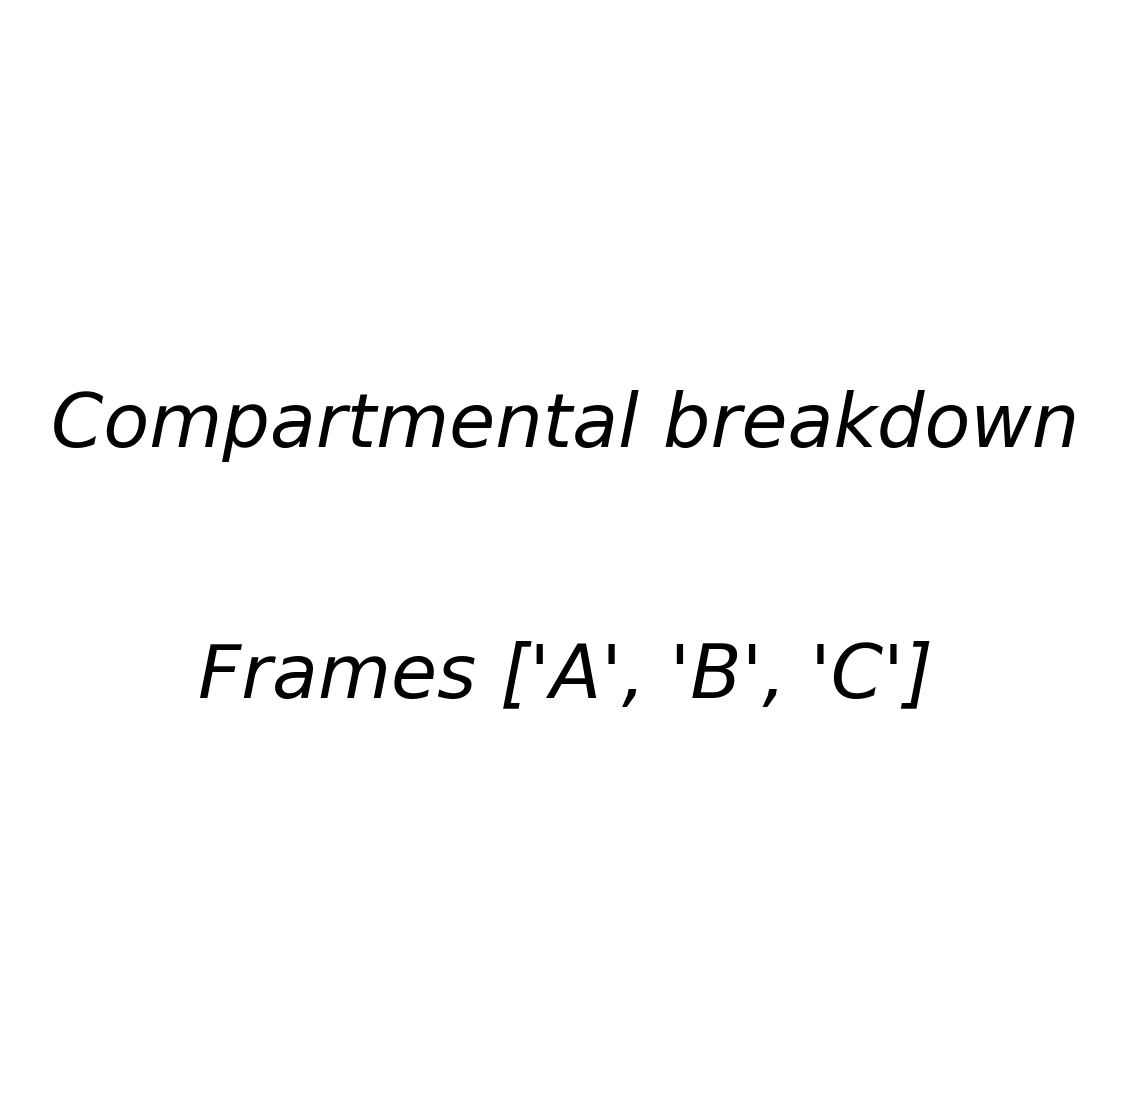

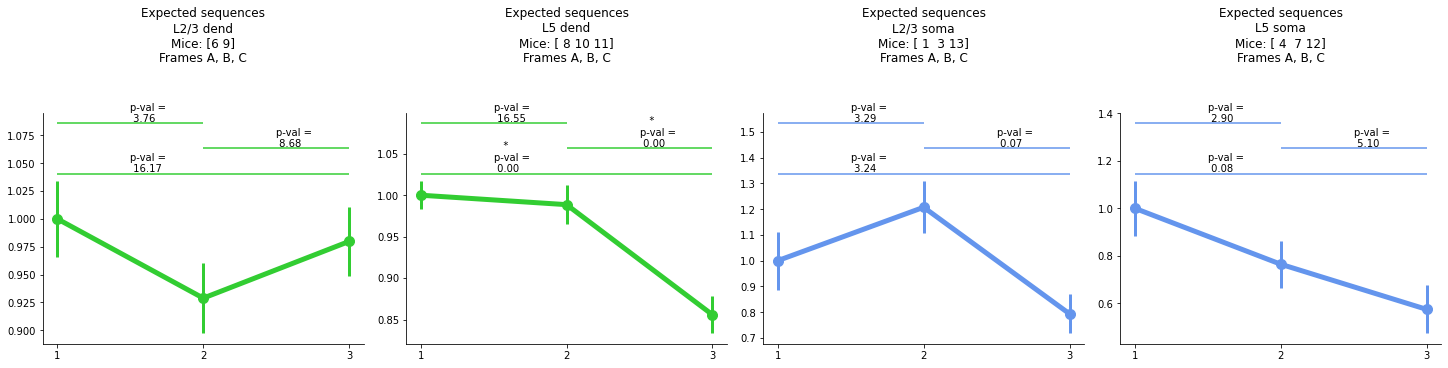

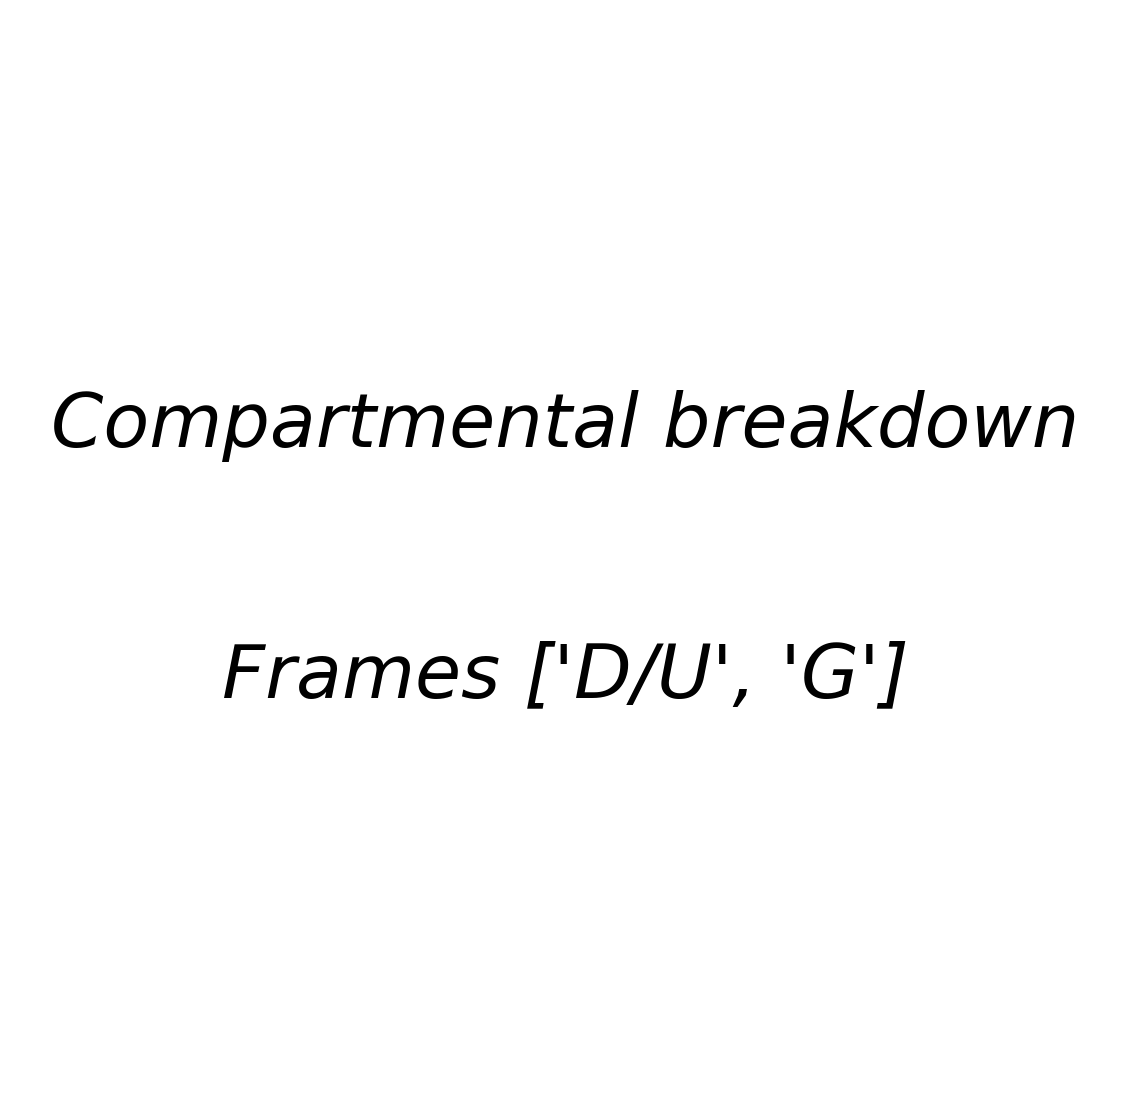

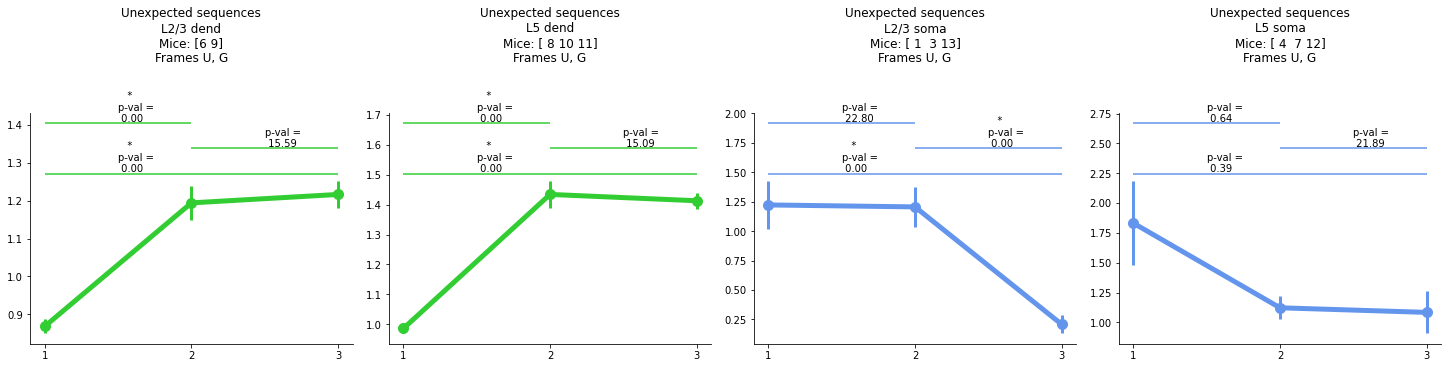

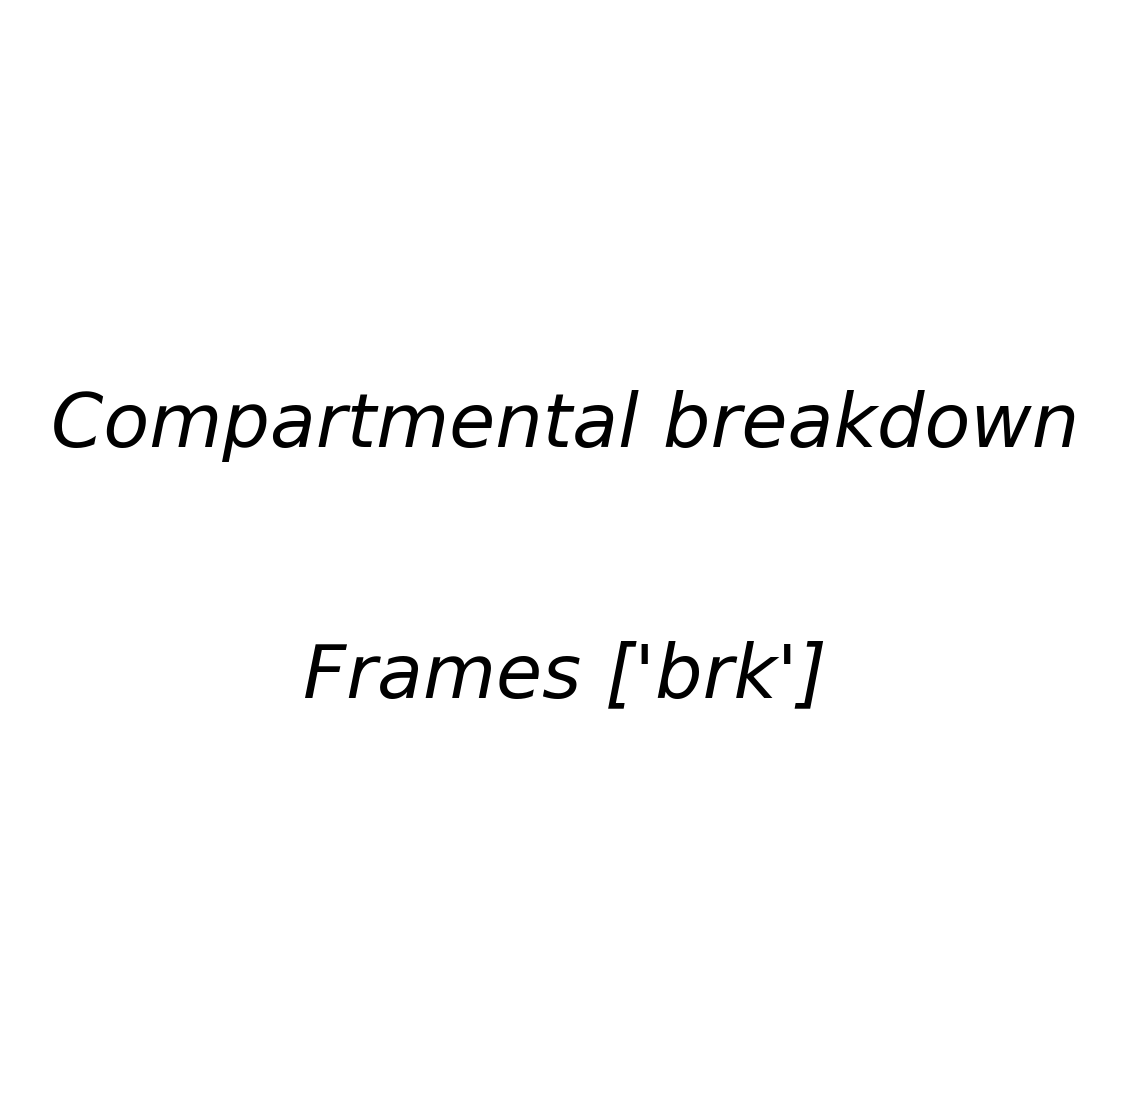

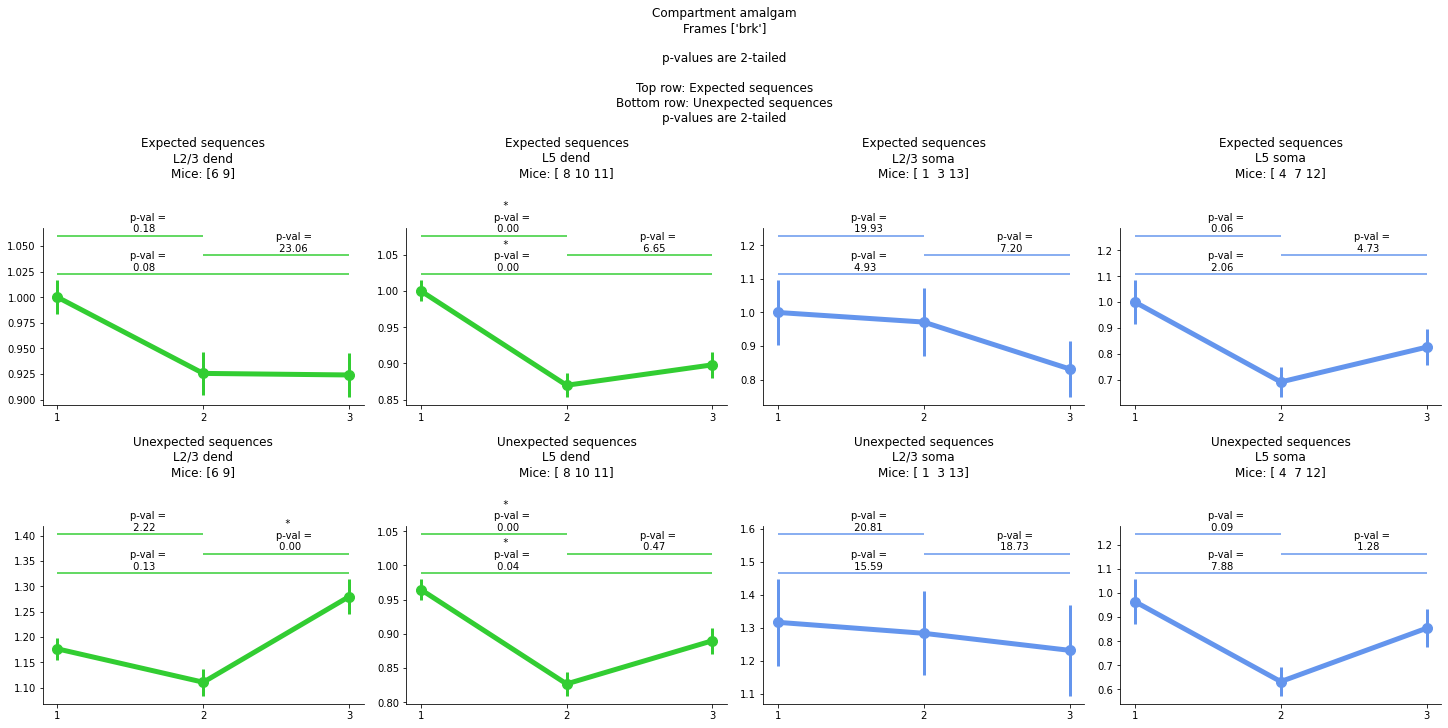

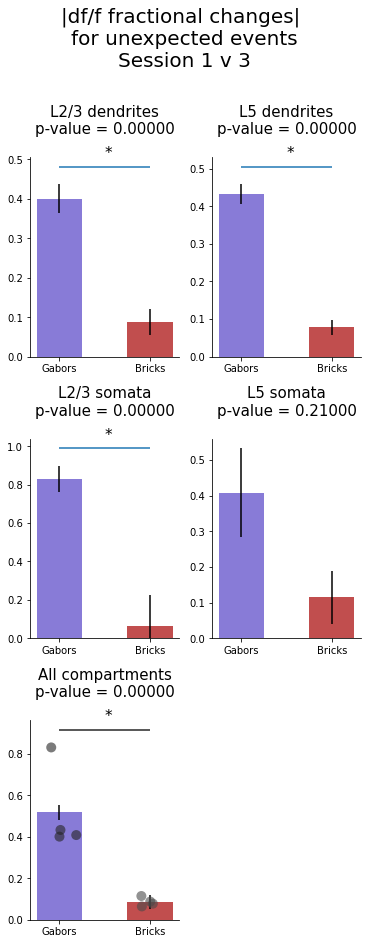

In [8]:
# Gabors

figsize=(20,5)
frames = ['A', 'B', 'C']
fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                          figsize=(20,20))
fig = mdp.plot_layer_compartment_df(gab_all_abc_lyr_cmpt_dff_normed_df, mouse_df,
                                    frames, 
                                    sess_ns, figsize=figsize, expec_str_list=['expec'],
                                    title_frames=True)
frames = ['D/U', 'G']
fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                          figsize=(20,20))
fig = mdp.plot_layer_compartment_df(gab_all_dug_lyr_cmpt_dff_normed_df, mouse_df,
                                    frames, 
                                    sess_ns, figsize=figsize, expec_str_list=['unexp'],
                                    title_frames=True)

#################

# Visual flow

figsize=(20,10)
frames = ['brk']
fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                          figsize=(20,20))
fig = mdp.plot_layer_compartment_df(brk_all_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                    sess_ns, figsize=figsize, 
                                    expec_str_list=['expec', 'unexp'],
                                    title_frames=False)

#################

# Fractional changes comparison

figsize=(10,10)
bonf_n = 5
alpha = 0.05 / bonf_n
fig = mdp.plot_absolute_fractional_changes(dff_unexp_abs_frac_changes_df, alpha)

## All ROIs, PDF

In [9]:
# Gabors

figsize=(20,5)
pdf_fnm = '../plots/gab--all--dff-changes-over-days--compartmental-breakdown.pdf'
with PdfPages(pdf_fnm) as pdf:
    frames = ['A', 'B', 'C']
    fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                              figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = mdp.plot_layer_compartment_df(gab_all_abc_lyr_cmpt_dff_normed_df, mouse_df, 
                                        frames, sess_ns, figsize=figsize, 
                                        expec_str_list=['expec'],
                                        title_frames=True)
    pdf.savefig()
    plt.close()

    frames = ['D/U', 'G']
    fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames),
                              figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = mdp.plot_layer_compartment_df(gab_all_dug_lyr_cmpt_dff_normed_df, mouse_df, 
                                        frames, sess_ns, figsize=figsize,
                                        expec_str_list=['unexp'],
                                        title_frames=True)
    pdf.savefig()
    plt.close()

#################

# Visual flow

figsize=(20,10)
pdf_fnm = '../plots/brk--all--dff-changes-over-days--compartmental-breakdown.pdf'
with PdfPages(pdf_fnm) as pdf:
    frames = ['brk']
    fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                              figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = mdp.plot_layer_compartment_df(brk_all_lyr_cmpt_dff_normed_df, mouse_df, 
                                        frames, sess_ns, figsize=figsize, 
                                        expec_str_list=['expec', 'unexp'],
                                        title_frames=False)
    pdf.savefig()
    plt.close()

#################

# Fractional changes comparison

figsize=(10,10)
bonf_n = 5
alpha = 0.05 / bonf_n
pdf_fnm = '../plots/dff-absolute-fractional-change-comparison.pdf'
with PdfPages(pdf_fnm) as pdf:
    fig = mdp.plot_absolute_fractional_changes(dff_unexp_abs_frac_changes_df, alpha) 
    pdf.savefig()
    plt.close()    

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


## Tracked ROIs, in-notebook

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


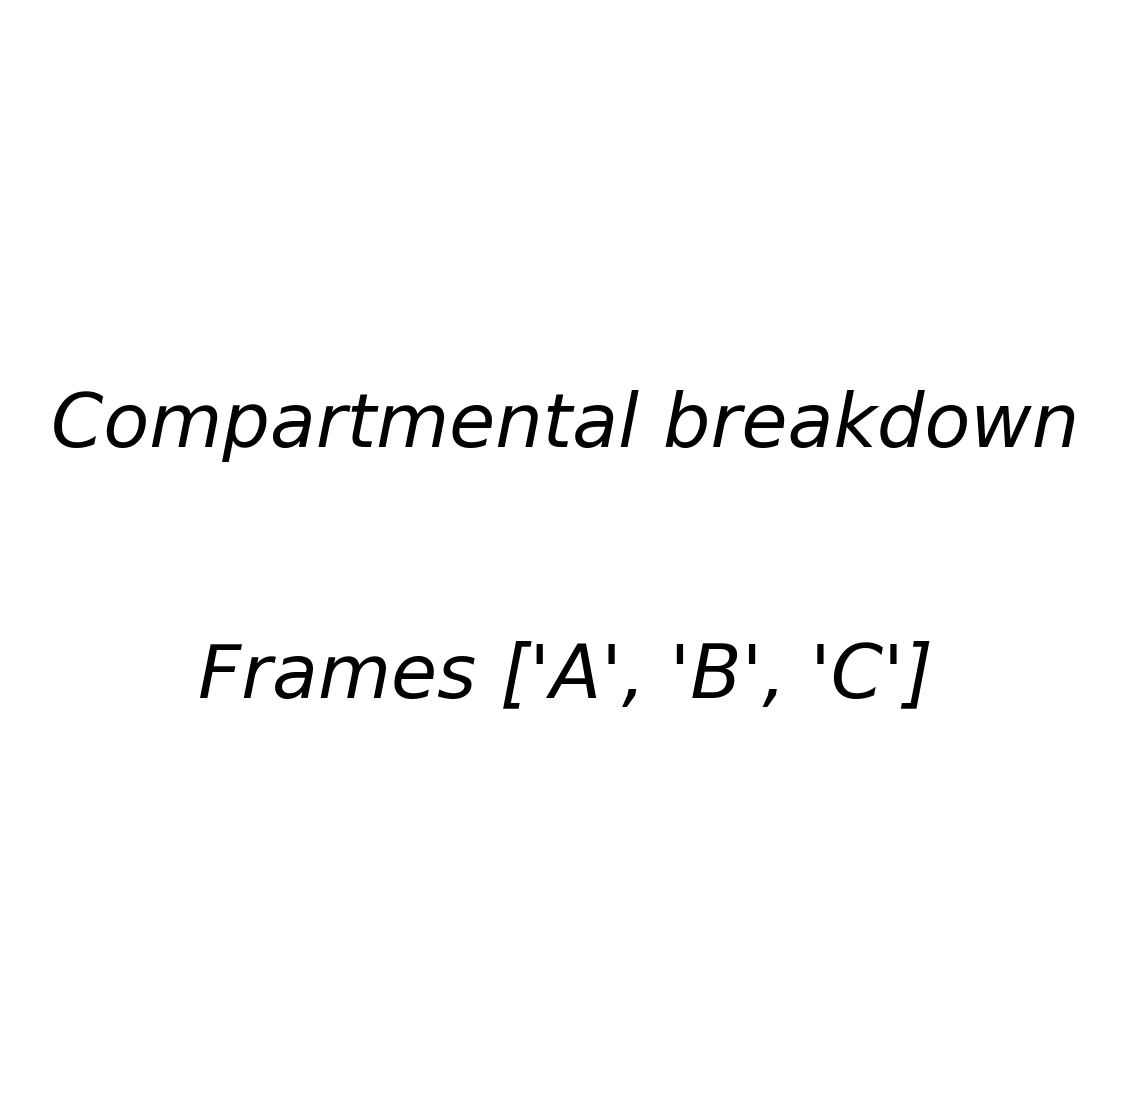

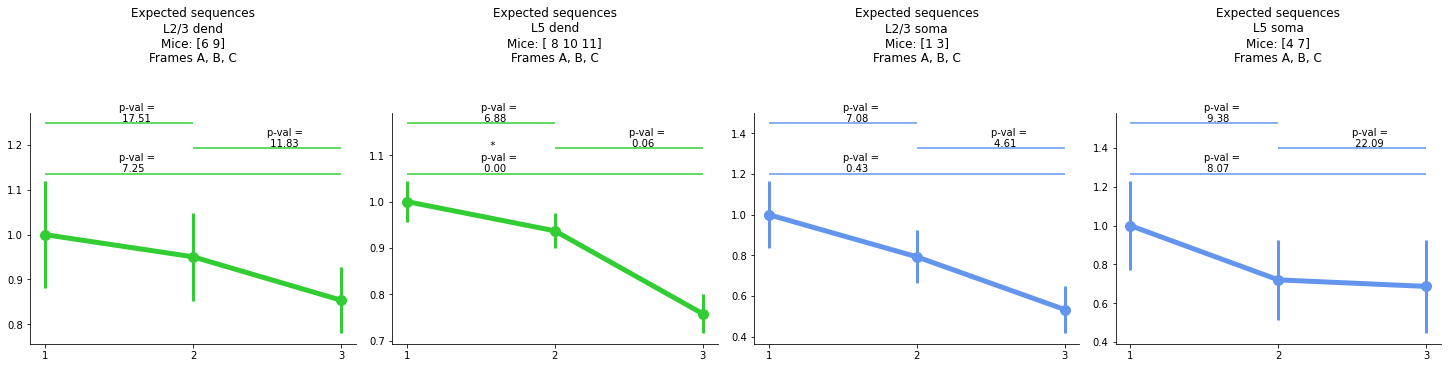

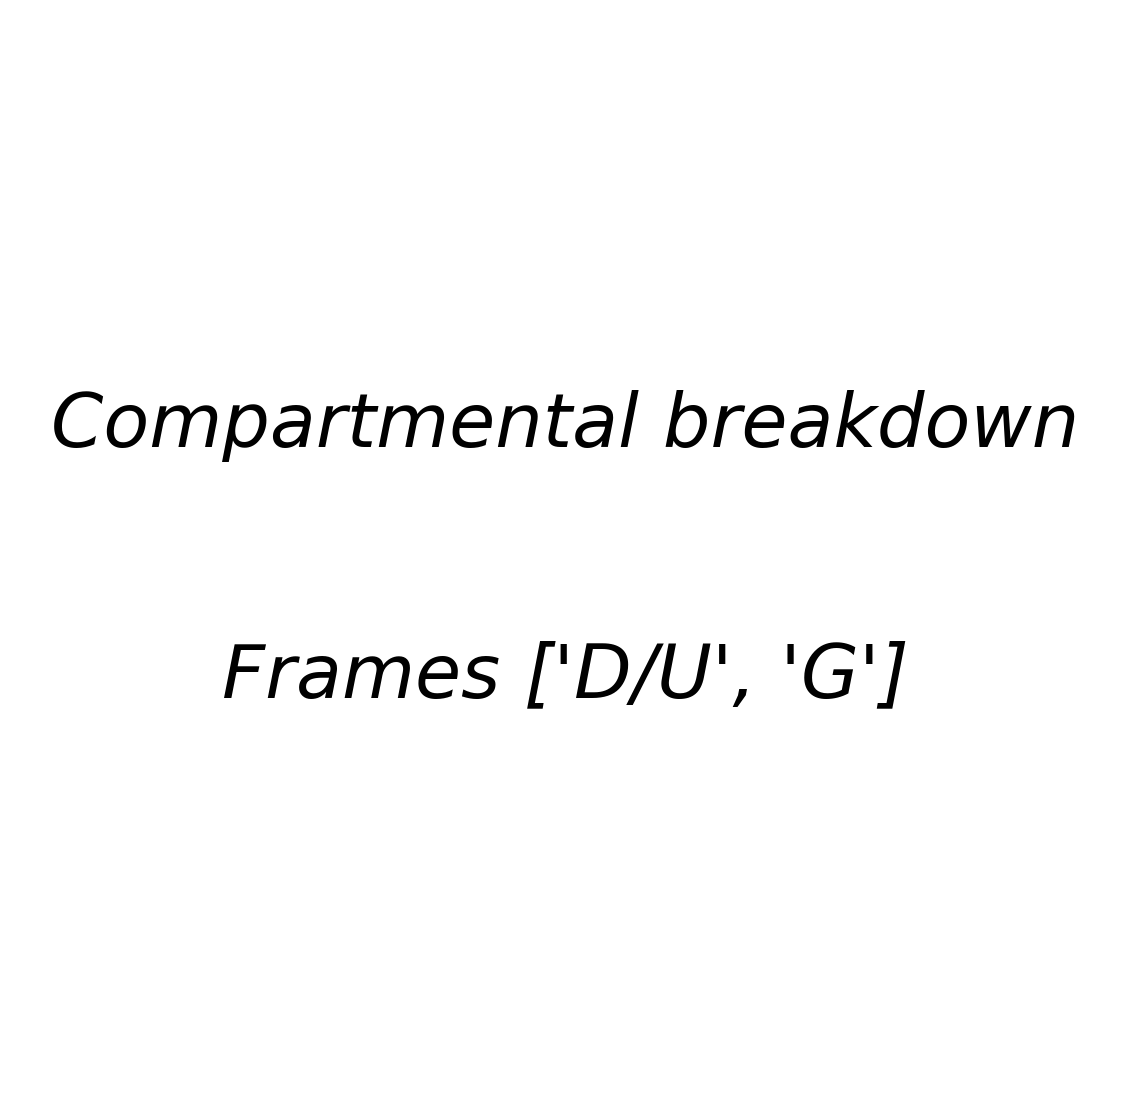

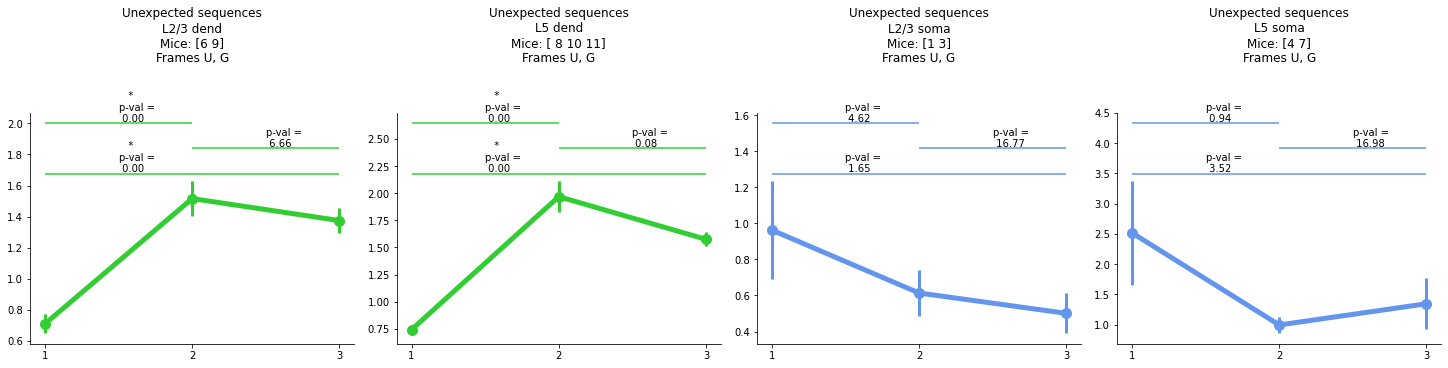

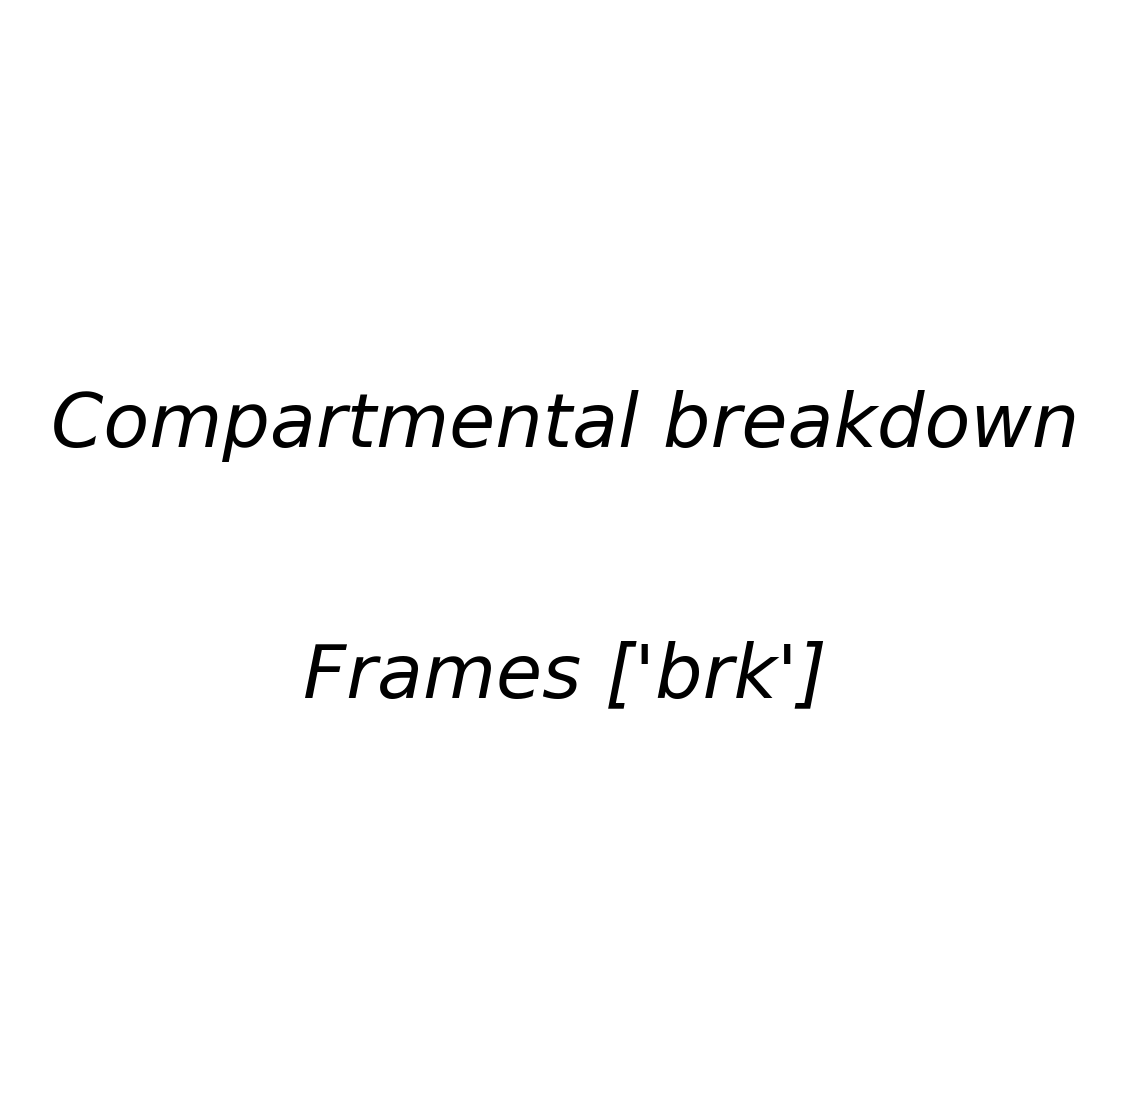

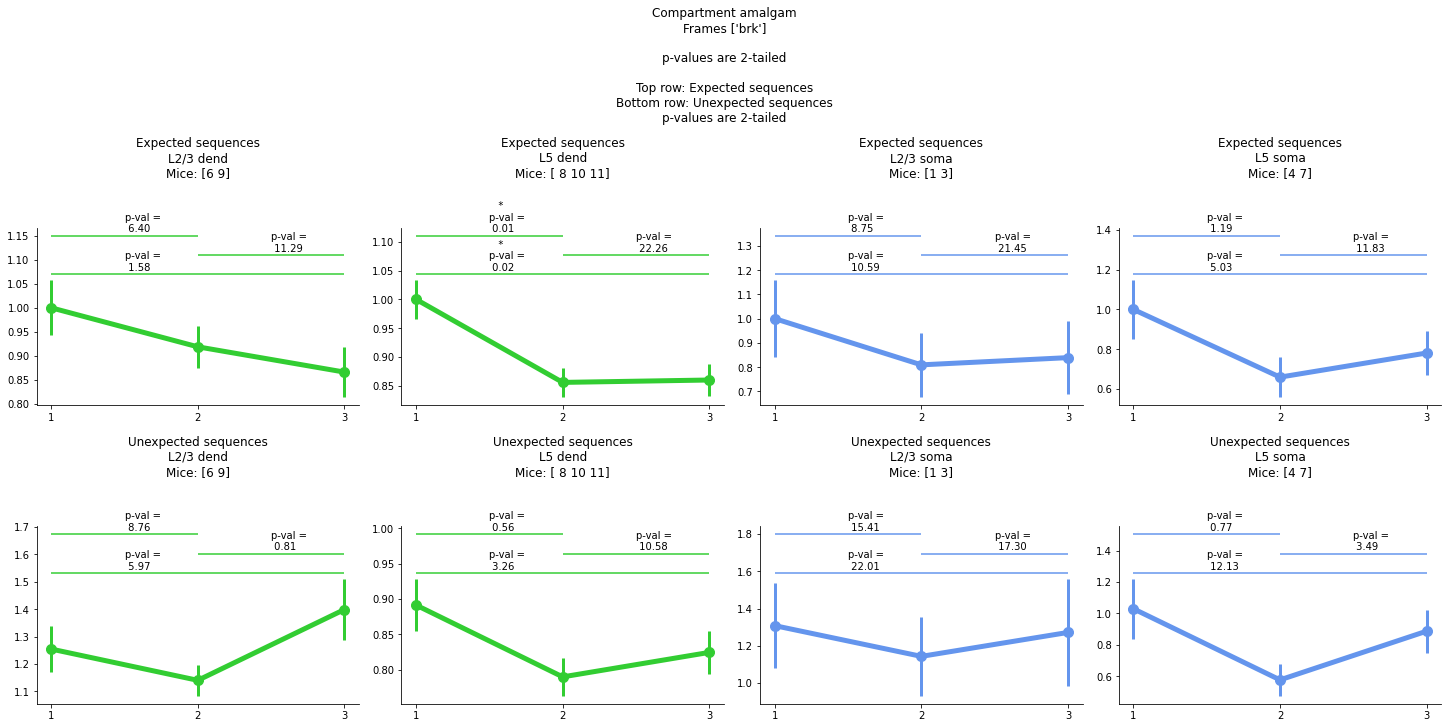

In [13]:
# Gabors

figsize=(20,5)
frames = ['A', 'B', 'C']
fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                          figsize=(20,20))
fig = mdp.plot_layer_compartment_df(gab_trk_abc_lyr_cmpt_dff_normed_df, mouse_df, 
                                    frames, sess_ns, figsize=figsize, 
                                    expec_str_list=['expec'],
                                    title_frames=True)
frames = ['D/U', 'G']
fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                      figsize=(20,20))
fig = mdp.plot_layer_compartment_df(gab_trk_dug_lyr_cmpt_dff_normed_df, mouse_df, 
                                    frames, sess_ns, figsize=figsize, 
                                    expec_str_list=['unexp'], title_frames=True)

#################

# Visual flow

figsize=(20,10)
frames = ['brk']
fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                      figsize=(20,20))
fig = mdp.plot_layer_compartment_df(brk_trk_lyr_cmpt_dff_normed_df, mouse_df, frames,
                                    sess_ns, figsize=figsize,
                                    expec_str_list=['expec', 'unexp'],
                                    title_frames=False)


## Tracked ROIs, PDF

In [14]:
# Gabors

figsize=(20,5)
pdf_fnm = '../plots/gab--trk--dff-changes-over-days--compartmental-breakdown.pdf'
with PdfPages(pdf_fnm) as pdf:
    frames = ['A', 'B', 'C']
    fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                          figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = mdp.plot_layer_compartment_df(gab_trk_abc_lyr_cmpt_dff_normed_df, mouse_df, 
                                        frames, sess_ns, figsize=figsize,
                                        expec_str_list=['expec'], title_frames=True)
    pdf.savefig()
    plt.close()

    frames = ['D/U', 'G']
    fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.
                              format(frames), figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = mdp.plot_layer_compartment_df(gab_trk_dug_lyr_cmpt_dff_normed_df, mouse_df, 
                                        frames, sess_ns, figsize=figsize, 
                                        expec_str_list=['unexp'], title_frames=True)
    pdf.savefig()
    plt.close()

#################

# Visual flow

figsize=(20,10)
pdf_fnm = '../plots/brk--trk--dff-changes-over-days--compartmental-breakdown.pdf'
with PdfPages(pdf_fnm) as pdf:
    frames = ['brk']
    fig = mdp.make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                          figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = mdp.plot_layer_compartment_df(brk_trk_lyr_cmpt_dff_normed_df, mouse_df, 
                                        frames, sess_ns, figsize=figsize,
                                        expec_str_list=['expec', 'unexp'],
                                        title_frames=False)
    pdf.savefig()
    plt.close()
       

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
